In [52]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [54]:
base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(128,128,3)) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(1,activation='sigmoid')(x) 

In [55]:
model=Model(inputs=base_model.input,outputs=preds)

In [56]:
print(len(model.layers))

92


In [57]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [58]:
image_data_generator=ImageDataGenerator(
                        rescale=1./255,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True)

train_generator=image_data_generator.flow_from_directory('data/train/', 
                                                 target_size=(128,128),
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 shuffle=True)

Found 5208 images belonging to 2 classes.


In [59]:
test_datagenerator = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagenerator.flow_from_directory(
        'data/validation/',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 622 images belonging to 2 classes.


In [61]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=15)

Epoch 1/15
162/162 [==============================] - 343s 2s/step - loss: 0.0847 - acc: 0.9736
Epoch 2/15
162/162 [==============================] - 344s 2s/step - loss: 0.0845 - acc: 0.9757
Epoch 3/15
162/162 [==============================] - 347s 2s/step - loss: 0.1053 - acc: 0.9652
Epoch 4/15
162/162 [==============================] - 338s 2s/step - loss: 0.0701 - acc: 0.9782
Epoch 5/15
162/162 [==============================] - 349s 2s/step - loss: 0.0599 - acc: 0.9833
Epoch 6/15
162/162 [==============================] - 314s 2s/step - loss: 0.0519 - acc: 0.9817
Epoch 7/15
162/162 [==============================] - 343s 2s/step - loss: 0.1124 - acc: 0.9617
Epoch 8/15
162/162 [==============================] - 342s 2s/step - loss: 0.0847 - acc: 0.9755
Epoch 9/15
162/162 [==============================] - 324s 2s/step - loss: 0.0557 - acc: 0.9835
Epoch 10/15
162/162 [==============================] - 312s 2s/step - loss: 0.0495 - acc: 0.9830
Epoch 11/15
162/162 [==================

In [ ]:
model.metrics_names
result=model.evaluate_generator(generator=validation_generator,steps=162)

dict_keys(['loss', 'acc'])


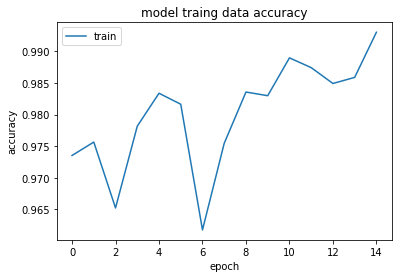

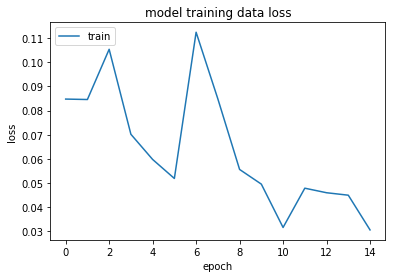

In [63]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model traing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model training data loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [72]:
model.metrics_names

['loss', 'acc']

In [75]:
print("Model loss is %f accuracy is %f "%(result[0],result[1]))

Model loss is 0.981378 accuracy is 82.356200 


In [66]:
from keras.models import load_model

model.save('model_using_ImageNet-128.h5')

In [4]:
from keras.models import load_model

s_model = load_model('model_using_ImageNet-128.h5')

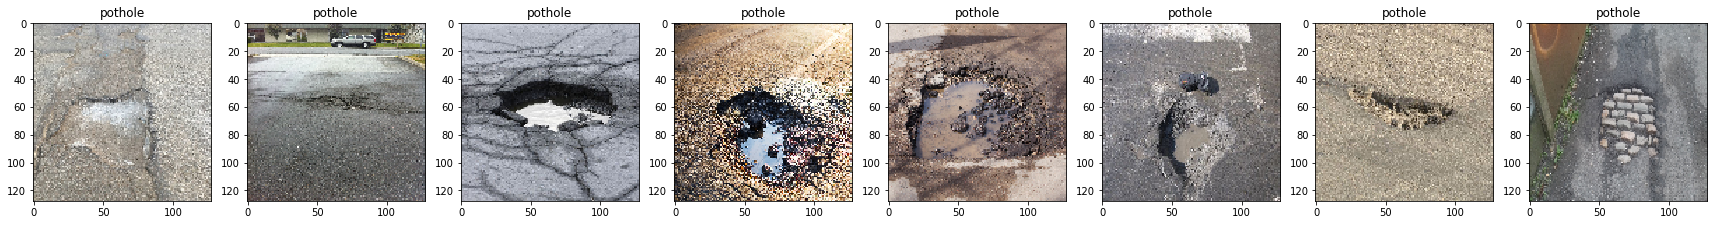

In [37]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
cnt=0
fig, axs = plt.subplots(ncols=8, figsize=(30, 50))
for eachFile in os.listdir("data/dTest/pos/"):
    if eachFile == ".DS_Store":
        continue
    path = "data/dTest/pos/"+eachFile
    image = load_img(path, target_size=(128,128))

    image_arr = img_to_array(image) 
    
    image_arr = np.expand_dims(image_arr, axis=0)
    image_arr /= 255
    prediction_array = s_model.predict(image_arr)
    axs[cnt].imshow(image)
    if prediction_array[0][0] > 0.3:
        axs[cnt].set_title("pothole")
    else: 
        axs[cnt].set_title("not pothole")
    cnt+=1
    

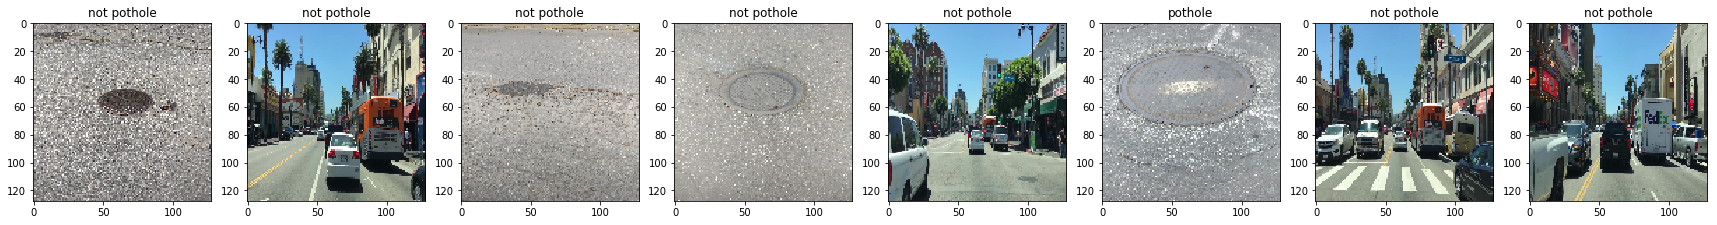

In [39]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
cnt=0
fig, axs = plt.subplots(ncols=8, figsize=(30, 50))
for eachFile in os.listdir("data/dTest/neg/"):
    if eachFile == ".DS_Store":
        continue
    path = "data/dTest/neg/"+eachFile
    image = load_img(path, target_size=(128,128))

    image_arr = img_to_array(image)
    image_arr = np.expand_dims(image_arr, axis=0)
    image_arr /= 255
    prediction_array = s_model.predict(image_arr)
    
    axs[cnt].imshow(image)
    if prediction_array[0][0] > 0.3:
        axs[cnt].set_title("pothole")
    else: 
        axs[cnt].set_title("not pothole")
    cnt+=1
    